In [2]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error


In [3]:
def plotDoseResponse2(inducer, doseResponseGreen, doseResponseRed,pad=0.01):
    fig,ax = plt.subplots()
    # ax.ticklabel_format(style='plain')      
    ax.plot(inducer,doseResponseGreen,label='GFP', c='green')
    # ax.set_ylim(0,np.amax(doseResponseGreen)*1.1)
    ax.set_ylim(0,6)
    ax.legend(loc='center left') #upper left
    ax.ticklabel_format(useOffset=False)
    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseRed,label='RFP', c='red')
    # ax2.set_ylim(0,np.amax(doseResponseRed)*1.1)
    ax2.set_ylim(0,130)

    ax2.legend(loc='center right') #upper right

    ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    plt.show()

def plotDoseResponse(inducer_list, U_ss, color='k'):
    plt.plot(inducer_list,U_ss, c=color)
    plt.xlabel('[inducer]')
    plt.ylabel('Fluorescence')
    plt.xscale('log')
    plt.show()

def doseResponse(subcircuit, inducer_list, initial_conditions=[10,10]):
    U_ss = []
    T=1000
    t = np.linspace(0, T, T*50)
    for inducer in inducer_list:
        sol = odeint(subcircuit.ddt, initial_conditions, t, args=(inducer,inducer))
        Ustar_ODE=sol[-1]
        U_ss.append(sol[-1])
    return np.array(U_ss)

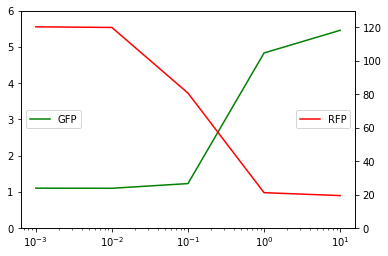

array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [4]:
doseResponseExp = pkl.load(open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl','rb'))
AHL_list = doseResponseExp['AHL_list']; gfpExp_list = doseResponseExp['maxATC_doseResponse_gfp']; rfpExp_list = doseResponseExp['maxATC_doseResponse_rfp']
plotDoseResponse2(AHL_list,gfpExp_list, rfpExp_list)
AHL_list

<ipython-input-27-c888cd9c58e5>:6: RuntimeWarning: overflow encountered in power
  return mu*( 1 + V * (1 / (1 + (km / (X+1e-08)) ** (n)) ))


mu = 1.097, V = 3.976, km = 0.46, n = 2.291


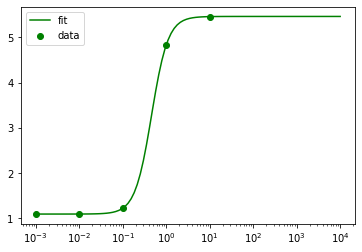

mu = 19.429, V = 5.199, km = 0.124, n = -1.976


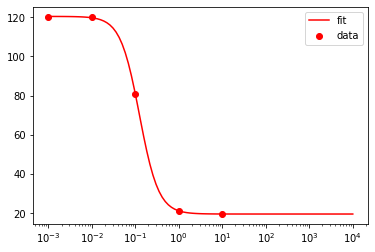

In [ ]:
from scipy.optimize import curve_fit
A_list = np.logspace(-3,4, 100)


def bioSigmoid(X,mu, V, km, n): 
     return mu*( 1 + V * (1 / (1 + (km / (X+1e-08)) ** (n)) ))

parameters, covariance = curve_fit(bioSigmoid, AHL_list, gfpExp_list, p0=[1, 5, 0.1,4])
gfpFit = bioSigmoid(A_list, *parameters)
plt.plot(A_list,gfpFit , label='fit', c='green')
plt.scatter(AHL_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
parameters = np.round(parameters,3)

print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')
plt.show()
parameters, covariance = curve_fit(bioSigmoid, AHL_list, rfpExp_list, p0=[1, 5, 0.1,-2])
rfpFit = bioSigmoid(A_list, *parameters)
plt.plot(A_list,rfpFit , label='fit', c='red')
plt.scatter(AHL_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
parameters = np.round(parameters,3)
print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')
plt.show()

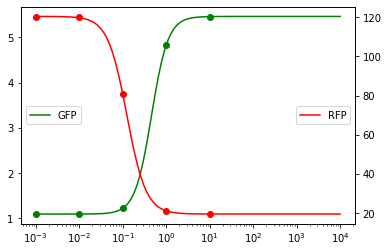

In [ ]:
fig,ax = plt.subplots()
# ax.ticklabel_format(style='plain')      
ax.plot(A_list,gfpFit,label='GFP', c='green')
ax.scatter(AHL_list, gfpExp_list, c='green')
ax.legend(loc='center left') #upper left
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.plot(A_list,rfpFit,label='RFP', c='red')
ax2.scatter(AHL_list, rfpExp_list, c='red')
ax2.legend(loc='center right') #upper right

ax2.ticklabel_format(useOffset=False)
ax.set_xscale('log')
plt.show()

# ABC Steps
Step 1: load parameter distributions (prior)\
Step 2: Sample from prior\
Step 3: Compare samples to ExpData with measure and select with threshold\
Step 4: Resample from chosen samples distribution and reduce threshold\
Step 5: 

Step 1: load parameter distributions (prior)


In [5]:

# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='0nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 10000

print(f'Circuit:{circuit_n}, Variant:{variant}')

df_full= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_balanced.pkl"%(circuit_n,variant,n_param_sets), "rb"))
df = df_full[['VE','VF','muLVA','Kbd','Kfe','nbd','nfe','Kee','nee']]
df_balanced = df_full[df_full['balance'] == 'Balanced']
df_balanced = df_balanced[['VE','VF','muLVA','Kbd','Kfe','nbd','nfe','Kee','nee']]

df_balanced

Circuit:circuit14, Variant:0nd


,VE,VF,muLVA,Kbd,Kfe,nbd,nfe,Kee,nee
39,135.071601,70.740091,4.234870,282.019659,29.688299,2.0,4.0,2.759599,4.0
55,374.823369,12.668799,4.567963,24.354543,1.140196,2.0,4.0,13.466556,4.0
110,497.823241,422.268051,3.210618,10.342381,2.402371,2.0,4.0,16.299446,4.0
163,587.913234,137.350124,3.642415,18.163844,4.073152,2.0,4.0,179.649466,4.0
219,320.867342,141.142323,3.507428,111.395903,32.306640,2.0,4.0,17.530428,4.0
...,...,...,...,...,...,...,...,...,...
9371,46.363624,93.468191,3.244729,41.570913,4.275614,2.0,4.0,1.773486,4.0
9382,142.424269,12.597716,3.867815,3.429163,3.049159,2.0,4.0,4.202704,4.0
9629,204.303488,33.611418,3.400673,24.770703,21.003452,2.0,4.0,68.192586,4.0
9658,263.489174,333.420829,3.451172,5.526032,134.094081,2.0,4.0,4.011761,4.0


In [6]:
subcircuit = lambda x: subcircuit1_circuit14(x)

# par_dict['VE'] = pars[0]

target


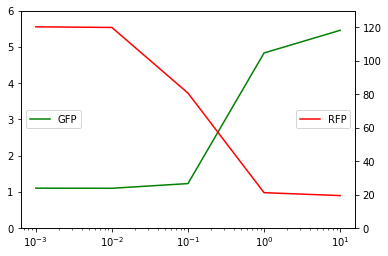

initial
pardict1 {'VE': 120, 'VF': 6, 'muLVA': 3.5033759791093995, 'Kbd': 0.9, 'Kfe': 0.01, 'nbd': 2.0, 'nfe': 4.0, 'Kee': 0.1, 'nee': 4.0}


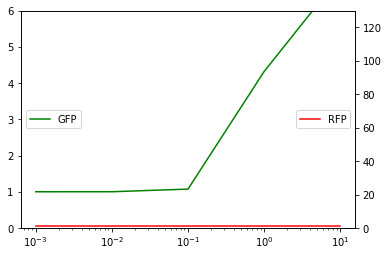

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.3438e+04                                    7.00e-01    
       1              2         1.6598e+04      2.68e+04       1.20e+02       7.38e+02    
       2              5         4.1948e+03      1.24e+04       1.50e+01       2.84e+04    
       3              9         2.8755e+03      1.32e+03       4.70e-01       8.18e+03    
       4             11         2.3780e+03      4.97e+02       1.18e-01       7.27e+02    
       5             13         2.3632e+03      1.49e+01       2.94e-02       3.69e+02    
       6             14         2.3576e+03      5.60e+00       2.94e-02       5.06e+02    
       7             16         2.3544e+03      3.17e+00       7.35e-03       2.24e+02    
       8             17         2.3528e+03      1.64e+00       7.35e-03       1.79e+02    
       9             18         2.3514e+03      1.42e+00       7.35e-03       1.51e+02    

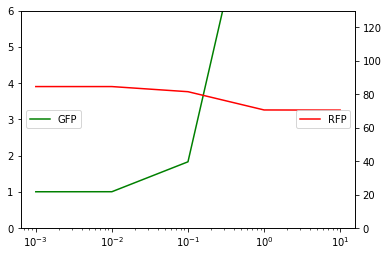

In [274]:
from scipy.optimize import least_squares
def residualDoseResponse(pars):
    par_dict2_data = df_balanced.iloc[0].to_dict()
    par_dict1 = {}
    for count,key in enumerate(par_dict2_data.keys()):
        par_dict1[key] = pars[count]

    U_ss1= doseResponse(subcircuit(par_dict1), AHL_list)
    data = np.array([rfpExp_list, gfpExp_list]).T
    # print(np.amax(data, keepdims=True, axis=0)[0])
    error = [np.sum(np.square(U_ss1 - data)[:,x]) for x in range(2)]
    # print(error)
    relError = np.divide(error,np.amax(data, keepdims=True, axis=0)[0])
    # print(relError)
    # print('-----------------')
    return relError

# residualDoseResponse(pars)


print('target')
plotDoseResponse2(AHL_list,gfpExp_list, rfpExp_list )

print('initial')
par_dict = df_balanced.iloc[7].to_dict()
par_dict['Kfe'] = 0.01
par_dict['Kbd'] = 0.9
par_dict['VF'] = 6
par_dict['VE'] = 120
par_dict['Kee'] = 0.1
print('pardict1', par_dict)
U_ss= doseResponse(subcircuit(par_dict), AHL_list)
plotDoseResponse2(AHL_list,U_ss[:,1], U_ss[:,0] )



pars = [x for x in par_dict.values()]
r = least_squares(residualDoseResponse,pars, max_nfev=2000 , verbose=2)
x = r['x']
new_par_dict = {}
for count,key in enumerate(par_dict.keys()):
    new_par_dict[key] = x[count]

print('final')
print(new_par_dict)
U_ss= doseResponse(subcircuit(new_par_dict), AHL_list)
plotDoseResponse2(AHL_list,U_ss[:,1], U_ss[:,0] )


In [ ]:
r


 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])
        cost: 86658056029.97997
         fun: array([  1179.1206959, 416310.8474858])
        grad: array([-2.64481723e+00, -1.35010919e+04,  0.00000000e+00,  4.53408260e+01,
       -1.86624578e-01,  1.20396373e+01, -1.27169430e-03,  1.61429082e+00,
        1.76221393e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])
         jac: array([[-2.24304199e-03,  1.59802342e-04,  0.00000000e+00,
        -1.84971197e-08, -1.58274364e-04,  0.00000000e+00,
        -1.07851071e-06,  1.36906325e-03,  1.49451530e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000

Step 2: Sample from prior


target


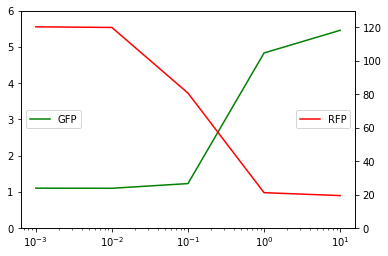

initial
pardict1 {'VE': 320.5673279216859, 'VF': 164.22057398878025, 'muLVA': 3.5033759791093995, 'Kbd': 4.373349671816809, 'Kfe': 1.6267257216877773, 'nbd': 2.0, 'nfe': 4.0, 'Kee': 0.1, 'nee': 4.0}


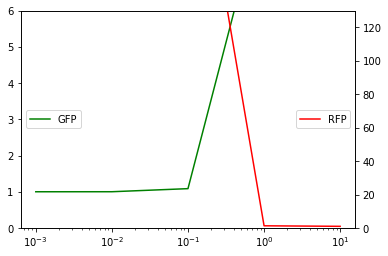

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.0380e+09                                    8.51e+09    


/Users/mo2016/Documents/modelling/lib/equations/class_subcircuit_eq.py:27: RuntimeWarning: invalid value encountered in double_scalars
  inh = 1 / (1 + (X / (km+1e-08)) ** (n))
/Users/mo2016/Documents/modelling/lib/equations/class_subcircuit_eq.py:22: RuntimeWarning: invalid value encountered in double_scalars
  act = ((X / km) ** (n)) / (1 + (X / km) ** (n))
/Users/mo2016/Documents/modelling/lib/equations/class_subcircuit_eq.py:23: RuntimeWarning: invalid value encountered in double_scalars
  act = (1 / (1 + (km / (X+1e-08)) ** (n)))


       1              6         1.6503e+08      3.87e+09       1.41e+00       6.51e+08    
       2              9         1.0996e+08      5.51e+07       1.76e-01       1.55e+08    
       3             11         1.0508e+08      4.88e+06       4.40e-02       7.32e+07    
       4             12         1.0171e+08      3.37e+06       4.40e-02       5.08e+07    
       5             13         9.7724e+07      3.98e+06       8.80e-02       3.05e+07    
       6             15         9.6517e+07      1.21e+06       4.40e-02       4.03e+07    
       7             16         9.5596e+07      9.21e+05       4.40e-02       3.92e+07    
       8             17         9.4605e+07      9.91e+05       4.40e-02       4.28e+07    
       9             18         9.3629e+07      9.75e+05       4.40e-02       3.63e+07    
      10             19         9.2593e+07      1.04e+06       4.40e-02       3.86e+07    
      11             20         9.1535e+07      1.06e+06       4.40e-02       3.27e+07    

In [7]:
from scipy.optimize import least_squares
def residualDoseResponse(pars):
    par_dict2_data = df_balanced.iloc[0].to_dict()
    par_dict1 = {}
    for count,key in enumerate(par_dict2_data.keys()):
        par_dict1[key] = pars[count]

    U_ss1= doseResponse(subcircuit(par_dict1), AHL_list)
    data = np.array([rfpExp_list, gfpExp_list]).T
    # print(np.amax(data, keepdims=True, axis=0)[0])
    error = [np.sum(np.square(U_ss1 - data)[:,x]) for x in range(2)]
    # print(error)
    relError = np.divide(error,np.amax(data, keepdims=True, axis=0)[0])
    # print(relError)
    # print('-----------------')
    return error

# residualDoseResponse(pars)


print('target')
plotDoseResponse2(AHL_list,gfpExp_list, rfpExp_list )

print('initial')
par_dict = df_balanced.iloc[7].to_dict()
par_dict['Kee'] = 0.1
print('pardict1', par_dict)
U_ss= doseResponse(subcircuit(par_dict), AHL_list)
plotDoseResponse2(AHL_list,U_ss[:,1], U_ss[:,0] )



pars = [x for x in par_dict.values()]
r = least_squares(residualDoseResponse,pars, verbose=2)
x = r['x']
new_par_dict = {}
for count,key in enumerate(par_dict.keys()):
    new_par_dict[key] = x[count]

print('final')
print(new_par_dict)
U_ss= doseResponse(subcircuit(new_par_dict), AHL_list)
plotDoseResponse2(AHL_list,U_ss[:,1], U_ss[:,0] )
